Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots

C:\Users\npooj_lqfqpr2\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


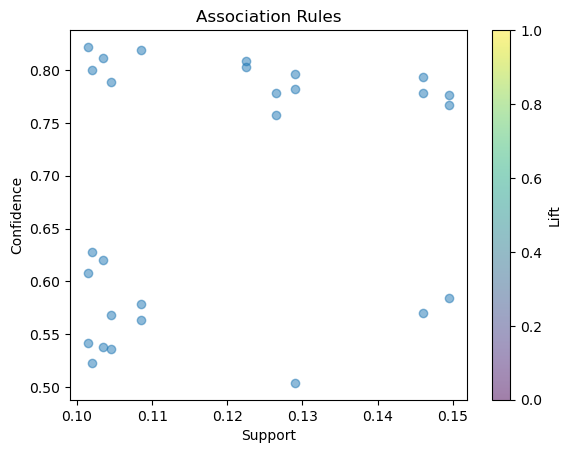

C:\Users\npooj_lqfqpr2\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


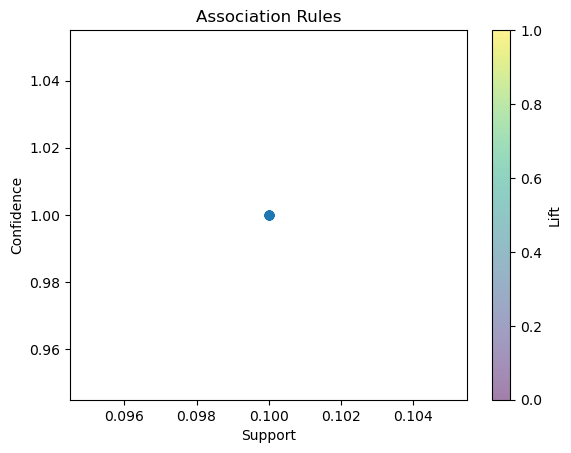

C:\Users\npooj_lqfqpr2\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


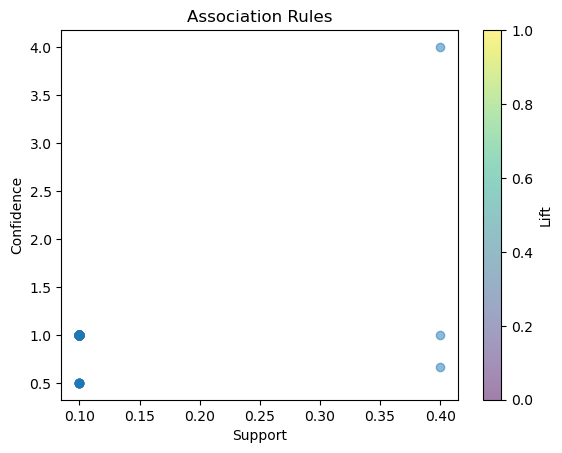

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt

book_df = pd.read_csv('book.csv')
movies_df = pd.read_csv('my_movies.csv')

# preprocessing data and rules
def generate_and_visualize_rules(data, support, confidence, min_len):
    # Convert non-binary values to binary using one-hot encoding
    data_encoded = pd.get_dummies(data, prefix='', prefix_sep='')

    # Applying Apriori algorithm...
    frequent_itemsets = apriori(data_encoded, min_support=support, use_colnames=True)
    
    # association rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
    
    # Filtering the rules based on minimum length
    rules = rules[rules['antecedents'].apply(lambda x: len(x) >= min_len)]

    # Visualizing rules
    scatter_plot = plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Association Rules')
    plt.colorbar(scatter_plot, label='Lift')
    plt.show()

    return rules

# Experiment 1: Trying different values of support and confidence
rules_exp1 = generate_and_visualize_rules(book_df, support=0.1, confidence=0.5, min_len=2)

# Experiment 2: Changing the minimum length
rules_exp2 = generate_and_visualize_rules(movies_df, support=0.05, confidence=0.3, min_len=3)

# Experiment 3: Changing the minimum length in Apriori algorithm
rules_exp3 = generate_and_visualize_rules(movies_df, support=0.05, confidence=0.3, min_len=2)
